In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import sqlite3
import plotly.express as px
import us
from ipywidgets import widgets, interact
import plotly.graph_objects as go

In [2]:
df = pd.read_excel("Health_Science_Dataset.xlsx", header=1)
df
print(df.columns.tolist())


['Data As Of', 'Start Week', 'End Week', 'MMWRyear', 'MMWRweek', 'Week Ending Date', 'Group', 'Indicator', 'Jurisdiction', 'Age Group', 'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia or Influenza', 'Pneumonia, Influenza, or COVID-19 Deaths']


In [26]:
for col_idx in [6, 7, 8, 9]:
    col_name = df.columns[col_idx]
    df[col_name] = df[col_name].astype(str)

# Dates
for col_idx in [0, 1, 2, 5]:
    col_name = df.columns[col_idx]
    df[col_name] = pd.to_datetime(df[col_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Year
df['MMWRyear'] = df['MMWRyear'].astype(int)

# Integer
for col_idx in [4] + list(range(10, 16)):
    col_name = df.columns[col_idx]
    df[col_name] = df[col_name].apply(lambda x: int(x) if pd.notna(x) else x)


In [27]:
print(df.columns.tolist())



['Data As Of', 'Start Week', 'End Week', 'MMWRyear', 'MMWRweek', 'Week Ending Date', 'Group', 'Indicator', 'Jurisdiction', 'Age Group', 'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia or Influenza', 'Pneumonia, Influenza, or COVID-19 Deaths']


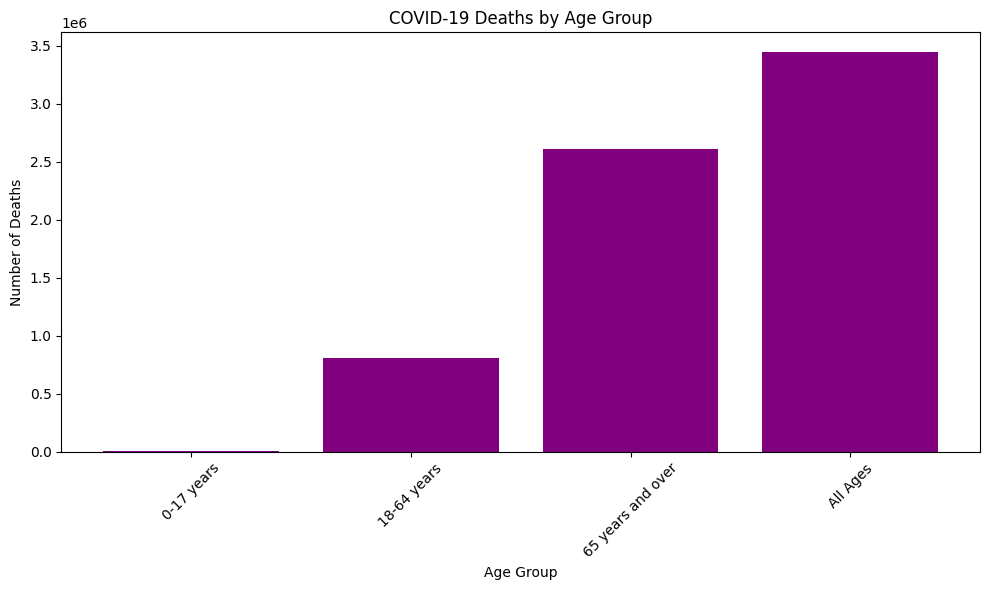

In [28]:
covid_deaths_by_age = df.groupby('Age Group')['COVID-19 Deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(covid_deaths_by_age['Age Group'], covid_deaths_by_age['COVID-19 Deaths'], color='purple')
plt.title('COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

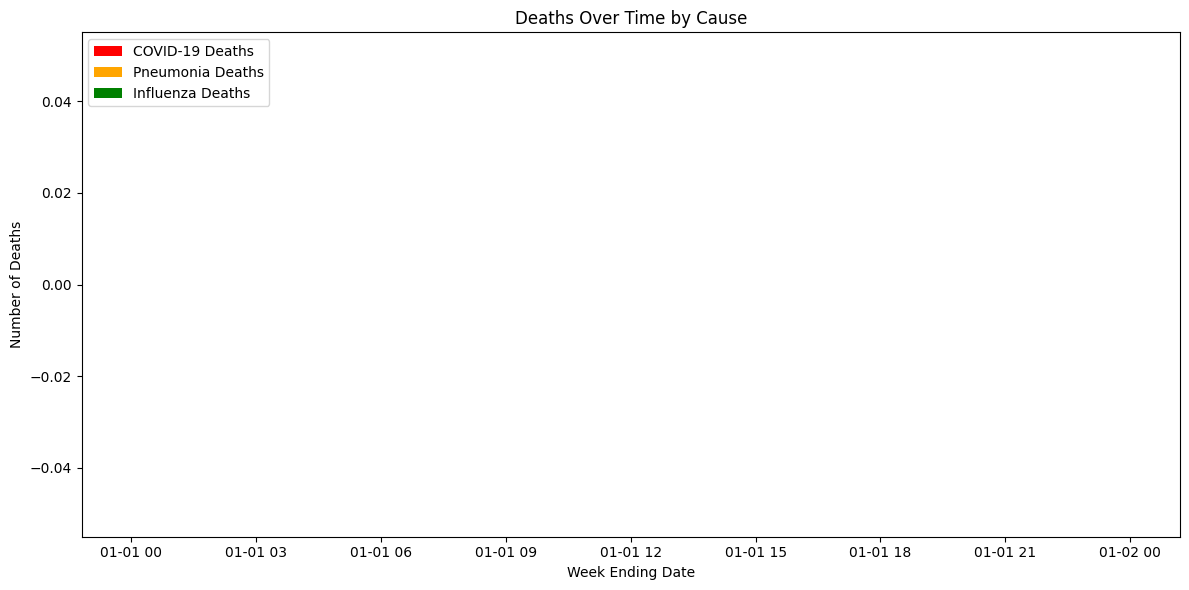

In [29]:
# Group by 'Week Ending Date' and sum the death causes
death_causes_over_time = df.groupby('Week Ending Date')[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths']].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.stackplot(death_causes_over_time['Week Ending Date'],
              death_causes_over_time['COVID-19 Deaths'],
              death_causes_over_time['Pneumonia Deaths'],
              death_causes_over_time['Influenza Deaths'],
              labels=['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths'],
              colors=['red', 'orange', 'green'])
plt.title('Deaths Over Time by Cause')
plt.xlabel('Week Ending Date')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

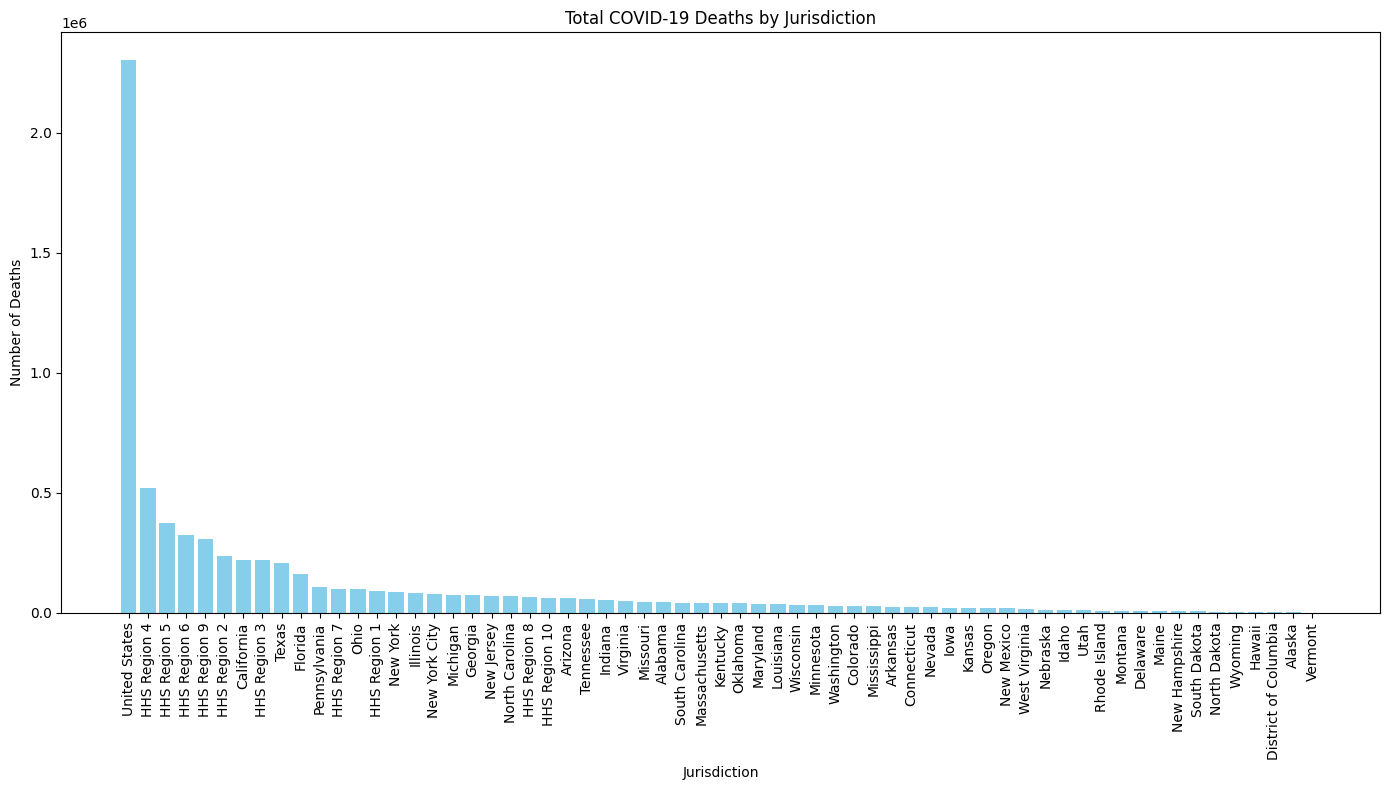

In [30]:
# Group by 'Jurisdiction' and sum the 'COVID-19 Deaths'
covid_deaths_by_jurisdiction = df.groupby('Jurisdiction')['COVID-19 Deaths'].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(covid_deaths_by_jurisdiction['Jurisdiction'], covid_deaths_by_jurisdiction['COVID-19 Deaths'], color='skyblue')
plt.title('Total COVID-19 Deaths by Jurisdiction')
plt.xlabel('Jurisdiction')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


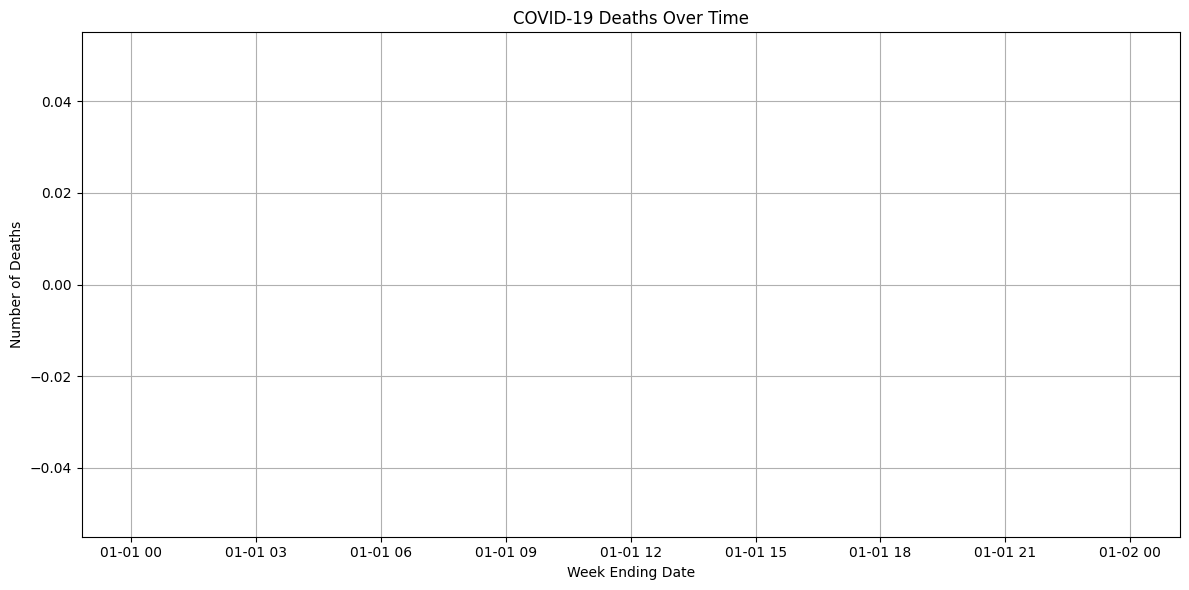

In [31]:
import matplotlib.pyplot as plt

# Group by 'Week Ending Date' and sum the 'COVID-19 Deaths'
covid_deaths_over_time = df.groupby('Week Ending Date')['COVID-19 Deaths'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(covid_deaths_over_time['Week Ending Date'], covid_deaths_over_time['COVID-19 Deaths'], marker='o', linestyle='-')
plt.title('COVID-19 Deaths Over Time')
plt.xlabel('Week Ending Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:

df_cleaned = df[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths']]
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')
df_cleaned = df_cleaned.dropna()


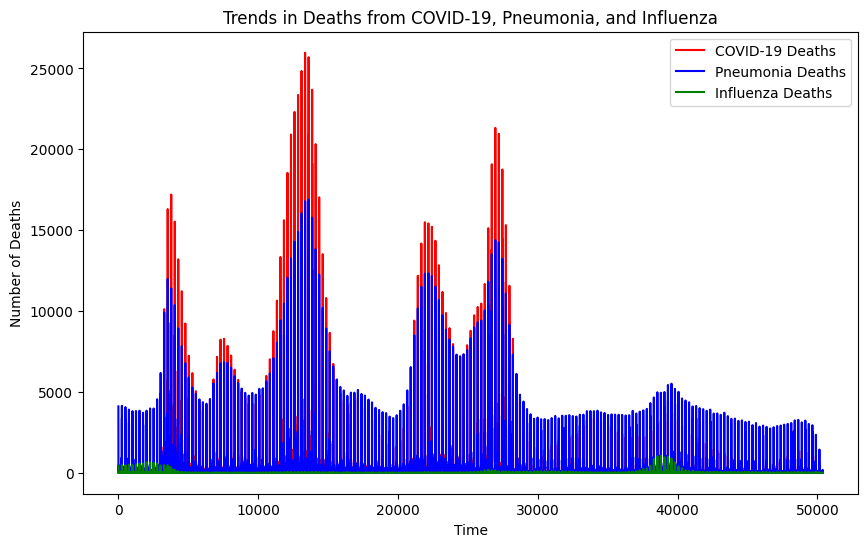

In [4]:


# Plot the time series trends for COVID-19, Pneumonia, and Influenza deaths
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.index, df_cleaned['COVID-19 Deaths'], label='COVID-19 Deaths', color='r')
plt.plot(df_cleaned.index, df_cleaned['Pneumonia Deaths'], label='Pneumonia Deaths', color='b')
plt.plot(df_cleaned.index, df_cleaned['Influenza Deaths'], label='Influenza Deaths', color='g')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('Trends in Deaths from COVID-19, Pneumonia, and Influenza')
plt.show()


In [5]:
correlation_matrix = df_cleaned.corr()

correlation_matrix

,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths
COVID-19 Deaths,1.000000,0.947707,0.225078
Pneumonia Deaths,0.947707,1.000000,0.375951
Influenza Deaths,0.225078,0.375951,1.000000


In [6]:
from sklearn.linear_model import LinearRegression

# Define the independent variable (e.g., Pneumonia and Influenza deaths) and dependent variable (COVID-19 deaths)
X = df_cleaned[['Pneumonia Deaths', 'Influenza Deaths']]
y = df_cleaned['COVID-19 Deaths']

# Create and train the regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Get the regression coefficients
reg_model.coef_

array([ 1.25266214, -5.25763648])

/var/folders/c1/rgwjffqd0lddvp6pqnv2s8br0000gn/T/ipykernel_87986/1403270940.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Week Ending Date'] = pd.to_datetime(df_filtered['Week Ending Date'])
/var/folders/c1/rgwjffqd0lddvp6pqnv2s8br0000gn/T/ipykernel_87986/1403270940.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['COVID-19 Deaths'] = pd.to_numeric(df_filtered['COVID-19 Deaths'], errors='coerce')
17:54:37 - cmdstanpy - INFO - Chain [1] start processing
17:54:37 - cmdstanp

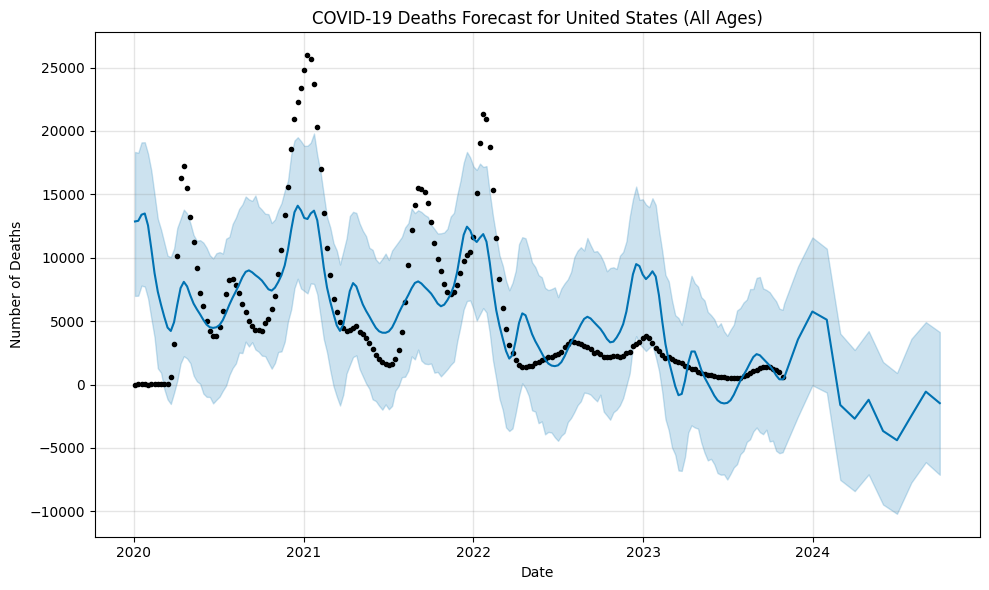

In [26]:
from prophet import Prophet

data = pd.ExcelFile("Health_Science_Dataset.xlsx")
df = data.parse('Sheet 1 - Provisional_Death_Cou')

df.columns = ['Data As Of', 'Start Week', 'End Week', 'MMWR Year', 'MMWR Week', 'Week Ending Date',
              'Group', 'Indicator', 'Jurisdiction', 'Age Group', 'COVID-19 Deaths', 
              'Total Deaths', 'Pneumonia Deaths', 'Influenza Deaths', 'Pneumonia or Influenza',
              'Pneumonia, Influenza, or COVID-19 Deaths']

# Filter for 'United States' and 'All Ages'
df_filtered = df[(df['Jurisdiction'] == 'United States') & (df['Age Group'] == 'All Ages')]

# Convert 'Week Ending Date' to datetime and COVID-19 Deaths to numeric
df_filtered['Week Ending Date'] = pd.to_datetime(df_filtered['Week Ending Date'])
df_filtered['COVID-19 Deaths'] = pd.to_numeric(df_filtered['COVID-19 Deaths'], errors='coerce')

# Prepare data for Prophet
df_prophet = df_filtered[['Week Ending Date', 'COVID-19 Deaths']].dropna().copy()
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' (date) and 'y' (value to predict)

# Initialize the Prophet model and fit the data
model = Prophet()
model.fit(df_prophet)

# Make future predictions (for the next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Customize the scatter plot for actual data points
plt.scatter(df_prophet['ds'], df_prophet['y'], color='k', s=5, alpha=0.7)  # Smaller points, added transparency
plt.title('COVID-19 Deaths Forecast for United States (All Ages)')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()